### RANDOM FOREST

#### About this Notebook

In this notebook we will be learning about Random Forest and will be using IRIS dataset for it. At last we will be predicting the class of the flower whether it is `IRIS-SETOSA`, `IRIS-VERGINICA`, `IRIS_VERSICOLOR`.

In [1]:
import matplotlib as plt
print('Matplotlib Version :', plt.__version__ )

Matplotlib Version : 3.2.1


##### Import Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
warnings.filterwarnings('ignore')

%matplotlib inline

##### Getting Data

In [3]:
df = pd.read_csv('IRIS.csv')
print("Data Imported Successfully")

Data Imported Successfully


In [4]:
df.shape

(150, 5)

In [5]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [10]:
# print the label species(setosa, versicolor,virginica)

df.species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [11]:
df.species.value_counts()

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: species, dtype: int64

##### Checking Null Values

In [12]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

##### Feature Selection and Visualization

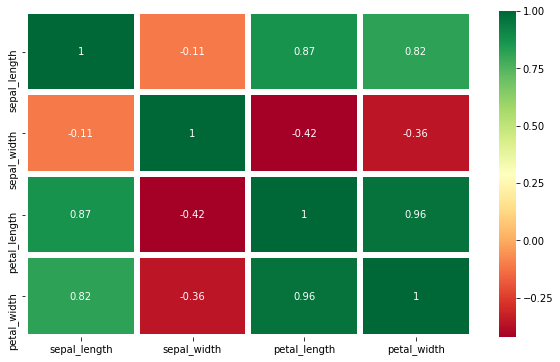

In [17]:
# Heat Map

plt.figure(figsize=(10,6))
ax = sns.heatmap(data=df.corr(), annot=True, linewidths=5, cmap='RdYlGn')

> __Species__

Nos of species Iris-Setosa, Iris-Versicolor, Iris-Virginica 

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: species, dtype: int64


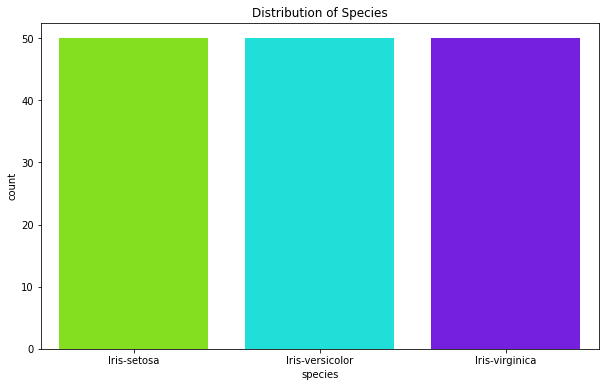

In [21]:
print('Nos of species Iris-Setosa, Iris-Versicolor, Iris-Virginica \n')
print(df['species'].value_counts())

plt.figure(figsize=(10,6))
sns.countplot(x = 'species', data=df, palette='hsv')
plt.title('Distribution of Species')
plt.show()

#####  Splitting Data - Independent & Dependent 

In [22]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [23]:
X = df.iloc[:,0:4].values
y = df.iloc[:,4:5].values

##### Splitting Data - Training & Test

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

##### Model Building

In [29]:
# Building Model

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [30]:
# Prediction

y_hat = clf.predict(X_test)

In [32]:
# Accuracy & Confusion Matrix

from sklearn import metrics
print("Train set Accuracy : ", metrics.accuracy_score(y_train, clf.predict(X_train))*100)
print("Test set Accuracy  : ", metrics.accuracy_score(y_test, y_hat) *100)

pd.crosstab(y_test.flatten(), y_hat, rownames=['Actual Species'], colnames = ['Predicted Species'])

Train set Accuracy :  100.0
Test set Accuracy  :  96.66666666666667


Predicted Species,Iris-setosa,Iris-versicolor,Iris-virginica
Actual Species,,,
Iris-setosa,11,0,0
Iris-versicolor,0,13,0
Iris-virginica,0,1,5


##### Finding Important Features  - Model Enhancement

In [62]:
df.keys()

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [76]:
a = df.columns.values.tolist()
a1 = np.array(a)
print('Original Array:', a1)
print('Modified Array:', a1[0:4])

Original Array: ['sepal_length' 'sepal_width' 'petal_length' 'petal_width' 'species']
Modified Array: ['sepal_length' 'sepal_width' 'petal_length' 'petal_width']


In [73]:
import pandas as pd

feature_imp = pd.Series(clf.feature_importances_, index = a1[0:4]).sort_values(ascending=False)
feature_imp

petal_width     0.439789
petal_length    0.387262
sepal_length    0.141919
sepal_width     0.031031
dtype: float64

In [34]:
clf.feature_importances_

array([0.14191857, 0.03103083, 0.38726166, 0.43978894])

No handles with labels found to put in legend.


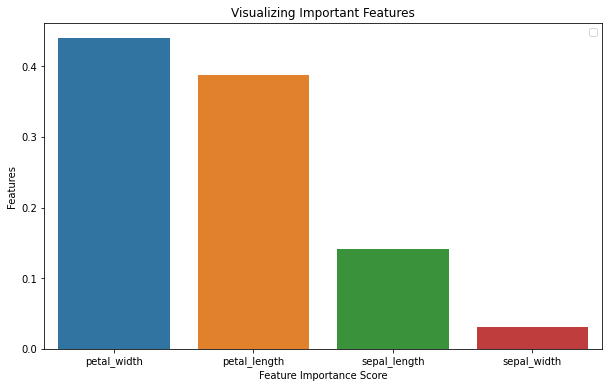

In [74]:
plt.figure(figsize = (10,6))

#Creating a bar plot
sns.barplot(x=feature_imp.index, y=feature_imp)

# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [56]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [58]:
# Building and Training model on petal_length and petal_width

X1 = df.iloc[:, 2:4].values
y1 = df.iloc[:, 4:5].values

from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=0)

from sklearn.ensemble import RandomForestClassifier
clf1 = RandomForestClassifier(n_estimators=100)
clf1.fit(X1_train, y1_train)

y_hat1 = clf1.predict(X1_test)

In [59]:
from sklearn import metrics
print("Train set Accuracy : ", metrics.accuracy_score(y1_train, clf1.predict(X1_train))*100)
print("Test set Accuracy  : ", metrics.accuracy_score(y1_test, y_hat1) *100)

pd.crosstab(y1_test.flatten(), y_hat1, rownames=['Actual Species'], colnames = ['Predicted Species'])

Train set Accuracy :  99.16666666666667
Test set Accuracy  :  100.0


Predicted Species,Iris-setosa,Iris-versicolor,Iris-virginica
Actual Species,,,
Iris-setosa,11,0,0
Iris-versicolor,0,13,0
Iris-virginica,0,0,6


##### Testing

In [90]:
# Test 1

test_1 = [[5.2, 2.0]]

y_predict1 = clf1.predict(test_1)
print("The predicted class of",test_1, "is", y_predict1)

The predicted class of [[5.2, 2.0]] is ['Iris-virginica']


In [91]:
# Test 2

test_2 = [[1.4, 0.2]]

y_predict2 = clf1.predict(test_2)
print("The predicted class of",test_2, "is", y_predict2)

The predicted class of [[1.4, 0.2]] is ['Iris-setosa']


In [93]:
# Test 3

test_3 = [[4.6, 1.5]]

y_predict3 = clf1.predict(test_3)
print("The predicted class of",test_3, "is", y_predict3)

The predicted class of [[4.6, 1.5]] is ['Iris-versicolor']
